Install the yfinance package, which is the downloader connected with the Yahoo Fiannce API.

In [590]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [591]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

##   1a. Major crypto currency chosen:Bitcoin-usd

   1b. Download btc-usd daily historical two years data and save it as btc-usd pandas data frame

In [592]:
initial_data = yf.download("BTC-USD", start="2020-12-04", end="2022-12-04")

[*********************100%***********************]  1 of 1 completed


In [593]:
initial_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-04,19446.966797,19511.404297,18697.193359,18699.765625,18699.765625,33872388058
2020-12-05,18698.384766,19160.449219,18590.193359,19154.230469,19154.230469,27242455064
2020-12-06,19154.179688,19390.500000,18897.894531,19345.121094,19345.121094,25293775714
2020-12-07,19343.128906,19411.828125,18931.142578,19191.630859,19191.630859,26896357742
2020-12-08,19191.529297,19283.478516,18269.945312,18321.144531,18321.144531,31692288756


In [594]:
initial_data['Adj Close'].head()

Date
2020-12-04    18699.765625
2020-12-05    19154.230469
2020-12-06    19345.121094
2020-12-07    19191.630859
2020-12-08    18321.144531
Name: Adj Close, dtype: float64

adjusted close price

In [595]:
data =  initial_data['Adj Close']
data.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 730 entries, 2020-12-04 to 2022-12-03
Series name: Adj Close
Non-Null Count  Dtype  
--------------  -----  
730 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB


plotting the movement/shape of BTC-USD from November 2020 to November 2022 and subsequently calculating its 
annualised volatility

fig 1.0

array([<AxesSubplot:xlabel='Date'>], dtype=object)

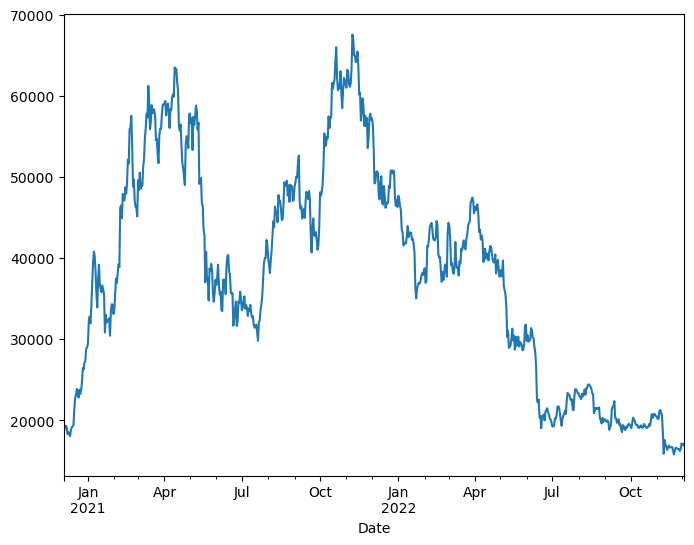

In [596]:
data.plot(figsize=(8, 6), subplots=True)

from the above, BTC-USD had its peak volatility in November/December of 2021 and fell sharply in November/December of 2022;theres bound to be an increse in volatility after this period

calculating the annualized return

In [597]:
data = yf.download("BTC-USD", start="2022-06-04", end="2022-09-04")

[*********************100%***********************]  1 of 1 completed


In [598]:
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

In [599]:
vol = np.sqrt(365) * log_return.std()
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 70.21 %


designing the derivative

a. Design a derivative and its associated pricing value using at least two methods which must be different.

Designing the vanilla derivative using the first model:
# Black Scholes method

In [600]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf

In [601]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

where S= spot price, k=strike price, T= time to maturity, r=interest rate, vol= volatility

In [632]:
s = 18699
K = 19154
T = 0.25   # 3 months june - sep
r = 0.04
q = 0
v = 0.7

In [633]:
euro_option_bs(s, K, T, r, vol, 'call')

2758.259424607415

In [ ]:
Designing the vanilla derivative using the first model:
# monte Carlo Simulation

In [604]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [605]:
T = 0.25
r = 0.04
sigma = 0.7
S0 =18699
K = 19154

In [606]:
S = mcs_simulation_np(100)

In [607]:
S = np.transpose(S)
S


array([[18699.        , 18276.14241655, 19172.02638447, ...,
        28680.73710063, 29336.96954849, 28225.9368332 ],
       [18699.        , 19058.88550151, 20072.24874851, ...,
        35532.84426583, 34504.28131114, 35626.50328507],
       [18699.        , 19950.99357142, 19540.91154997, ...,
        23378.48641344, 22440.73234563, 22860.38518268],
       ...,
       [18699.        , 19122.89115157, 17870.49149624, ...,
        22731.04300266, 23542.43064908, 24156.69123001],
       [18699.        , 18584.98115954, 17947.37720241, ...,
        33209.07335762, 34812.47494455, 36189.72464132],
       [18699.        , 18074.04737494, 17659.42861689, ...,
        20877.37603099, 19916.24902845, 19025.67327989]])

In [608]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 2496.5548527209858


# Greeks

1.DELTA
Delta, ∆, measures the rate of change of the theoretical option value with respect to changes in the underlying asset's price. Delta is the first derivative of the value V of the option with respect to the underlying instrument's price S.

In [609]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta



In [610]:
delta(18699, 19154, 0.25, 0.04, 0, 0.7, 'call')



0.55364716060398

if the underlying asset price decrease from 18,699 to 18698: call option value will reduce by $0.55 (dollars

fig 1.1

In [611]:
S = np.linspace(50,150,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 18699, 0.25, 0.04, 0, 0.7, 'call')

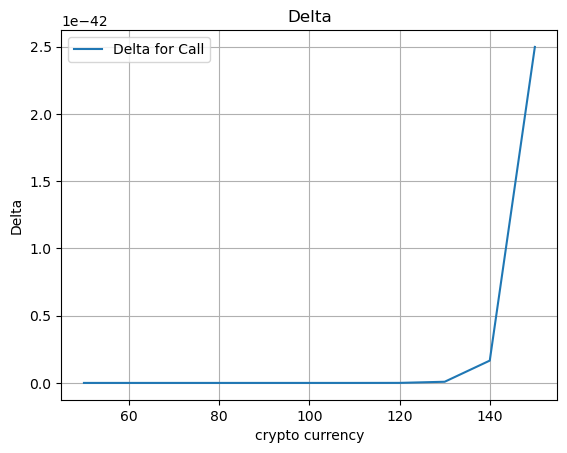

In [612]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.grid()
plt.xlabel('crypto currency')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call'])


## 2.GAMMA

Gamma, Γ, measures the rate of change in the delta with respect to changes in the underlying price. Gamma is the second derivative of the value function with respect to the underlying price.



In [613]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma




In [614]:
gamma(18699, 19154, 0.25, 0.04, 0, 0.7, 'call')

6.0405027206724167e-05

if the underlying asset price increase from 18699 to 18700 the call option for Delta will increase by 6.04

fig 1.2

In [615]:
S = np.linspace(50,150,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 18699, 0.25, 0.04, 0, 0.7, 'call')


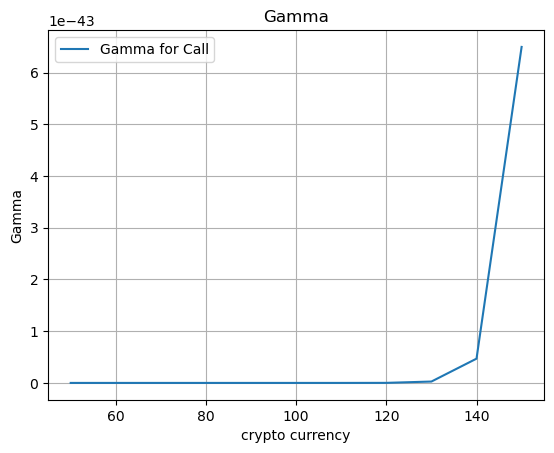

In [616]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('crypto currency')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call' ])


## 3.SPEED
Speed measures the rate of change in Gamma with respect to changes in the underlying price

In [617]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [618]:
speed(18699, 19154, 0.25, 0.04, 0, 0.7, 'call')


-2.2376499613033007e-09

when the underlying asset price change from 18699 to 1868 then the gamma will decrease by 2.237

fig 1.3

In [619]:
S = np.linspace(50,150,11)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 18699, 19154, 0.25, 0.04, 0.7, 'call')


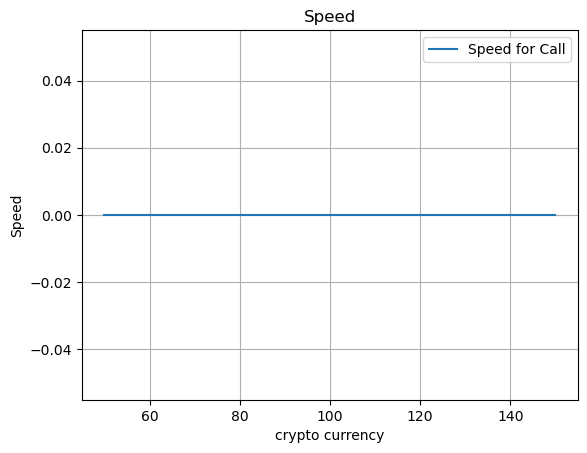

In [620]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('crypto currency')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call'])

## 4.theta

Theta, 𝜃, measures the sensitivity of the value of the derivative to the passage of time (see Option time value): 
the "time decay"

In [621]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) + q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) - r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta


In [622]:
theta(18699, 19154, 0.25, 0.04, 0, 0.7, 'call')

5489.25919524196

when there is an increase in time then call option value will increase by $1372.

fig 1.4

In [623]:
T = np.linspace(0.25,3,12)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(18699, 19154, 0.25, 0.04, 0, 0.7, 'call')

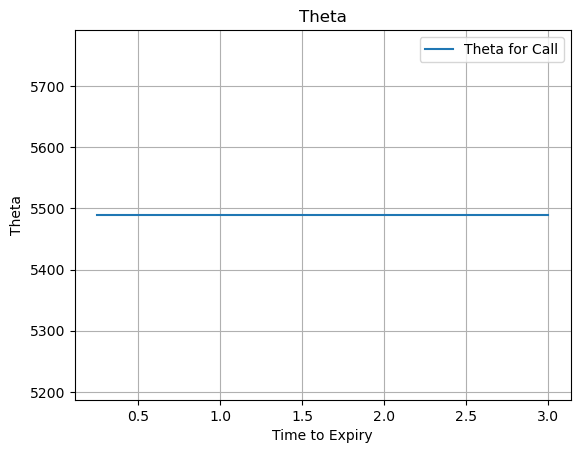

In [624]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call' ])

RHO


fig 1.5

In [625]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [626]:
rho(18699, 19154, 0.25, 0.04, 0, 0.7, 'call')



1966.6834409173605

In [ ]:
if the interest rate increase by 1% then call price will increase by $19.67

In [628]:
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(18699, 19154, 0.25, 0.04, 0, 0.7, 'call')

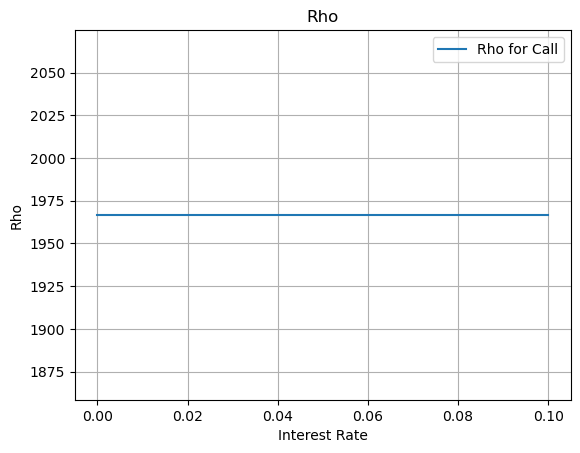

In [629]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')

plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call', ])